In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os
print(os.listdir("../input/data/"))

['images_003', 'images_012', 'LOG_CHESTXRAY.pdf', 'README_CHESTXRAY.pdf', 'BBox_List_2017.csv', 'images_009', 'images_008', 'images_007', 'test_list.txt', 'images_010', 'ARXIV_V5_CHESTXRAY.pdf', 'images_002', 'images_011', 'Data_Entry_2017.csv', 'images_001', 'train_val_list.txt', 'images_005', 'FAQ_CHESTXRAY.pdf', 'images_004', 'images_006']


In [5]:
# load data
data = pd.read_csv('../input/data/Data_Entry_2017.csv')
print(data.head(5))

num_obs = len(data)
print('Number of observations:',num_obs)

        Image Index          Finding Labels     ...          y]  Unnamed: 11
0  00000001_000.png            Cardiomegaly     ...       0.143          NaN
1  00000001_001.png  Cardiomegaly|Emphysema     ...       0.143          NaN
2  00000001_002.png   Cardiomegaly|Effusion     ...       0.168          NaN
3  00000002_000.png              No Finding     ...       0.171          NaN
4  00000003_000.png                  Hernia     ...       0.143          NaN

[5 rows x 12 columns]
Number of observations: 112120


In [6]:
import os


norm = [ '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/'+i for i in os.listdir('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/')]
pneumonia = [ '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/'+ i for i in os.listdir('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')]
dataaa = {"Finding Labels": "Normal", "full_path" : norm}
normdf = pd.DataFrame(dataaa)
print(normdf.shape)

dataaa2 = {"Finding Labels": "Pneumonia", "full_path" : pneumonia}
normdf = normdf.append(pd.DataFrame(dataaa2))
print(normdf.shape)

(1341, 2)
(5216, 2)


### Drop unnecessary columns

In [7]:
data.columns = ['Image Index', 'Finding Labels', 'Follow_Up_#', 'Patient_ID', 'Patient_Age', 'Patient_Gender','View_Position', 'Original_Image_Width', 'Original_Image_Height', 'Original_Image_Pixel_Spacing_X', 'Original_Image_Pixel_Spacing_Y', 'Unnamed']
data.drop(['Patient_ID', 'Original_Image_Pixel_Spacing_X', 'Original_Image_Pixel_Spacing_Y', 'Original_Image_Width', 'Original_Image_Height','Unnamed', 'Follow_Up_#', 'Patient_Age',], axis = 1, inplace = True)

In [8]:
from glob import glob

my_glob = glob('../input/data/images*/images/*.png')
print('Number of Observations: ', len(my_glob)) 

Number of Observations:  112120


In [9]:
imgdatapath = {os.path.basename(x): x for x in my_glob}
data['full_path'] = data['Image Index'].map(imgdatapath.get)

In [10]:
data = data.append(normdf, sort=True)

### Visualising Chest X-rays

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


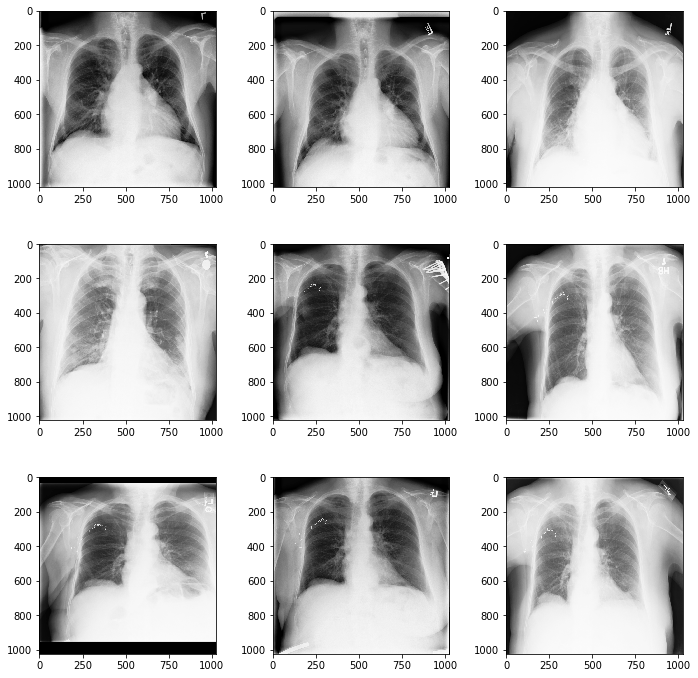

In [11]:
fig = plt.figure(figsize=(10, 10))
i = 1
for y in data['Image Index'].values[:9]:
    img = plt.imread(imgdatapath[y])
    fig.add_subplot(3,3,i)
    plt.imshow(img , cmap='Greys_r')
    i+=1
    
fig.tight_layout(pad=2)
fig.show()

In [12]:
num_unique_labels = data['Finding Labels'].nunique()
print('Number of unique labels:',num_unique_labels)

count_per_unique_label = data['Finding Labels'].value_counts() # get frequency counts per label
df_count_per_unique_label = count_per_unique_label.to_frame() # convert series to dataframe for plotting purposes

print(df_count_per_unique_label)

Number of unique labels: 837
                                                    Finding Labels
No Finding                                                   60361
Infiltration                                                  9547
Atelectasis                                                   4215
Pneumonia                                                     4197
Effusion                                                      3955
Nodule                                                        2705
Pneumothorax                                                  2194
Mass                                                          2139
Effusion|Infiltration                                         1603
Atelectasis|Infiltration                                      1350
Normal                                                        1341
Consolidation                                                 1310
Atelectasis|Effusion                                          1165
Pleural_Thickening               

In [13]:
dummy_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'Normal']

# One Hot Encoding of Finding Labels to dummy_labels
for label in dummy_labels:
    data[label] = data['Finding Labels'].map(lambda result: 1.0 if label in result else 0)
data.tail(20) 

,Finding Labels,Image Index,Patient_Gender,View_Position,full_path,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Normal
3855,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3856,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3857,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3858,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3859,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3860,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3861,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3862,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3863,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3864,Pneumonia,NaN,NaN,NaN,../input/chest-xray-pneumonia/chest_xray/train...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Infiltration          19894.0
Effusion              13317.0
Atelectasis           11559.0
Nodule                 6331.0
Mass                   5782.0
Pneumonia              5306.0
Pneumothorax           5302.0
Consolidation          4667.0
Pleural_Thickening     3385.0
Cardiomegaly           2776.0
Emphysema              2516.0
Edema                  2303.0
Fibrosis               1686.0
Normal                 1341.0
Hernia                  227.0
dtype: float64


(<matplotlib.axes._subplots.AxesSubplot at 0x7fb10428b390>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
  <a list of 15 Text xticklabel objects>))

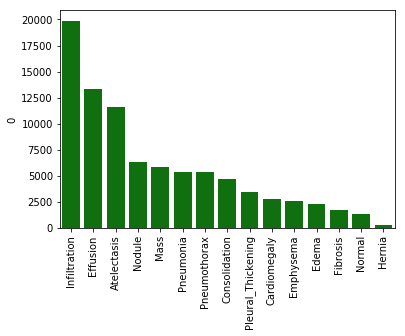

In [14]:
# now, let's see how many cases present for each of of our 14 clean classes

clean_labels = data[dummy_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels)

# plot cases using seaborn barchart

clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

In [15]:
## MODEL CREATION PHASE STARTS HERE

# create vector as ground-truth, will use as actuals to compare against our predictions later
data['target_vector'] = data.apply(lambda target: [target[dummy_labels].values], 1).map(lambda target: target[0])


In [16]:
all_labels=set()

def sep_diseases(x):
    list_diseases=x.split('|')
    for item in list_diseases:
        all_labels.add(item)
    return list_diseases

# Since the image may contain multiple disease labels
# Create a list of all disesases and append a new column named output to the x_ray dataframe
data['disease_vec']=data['Finding Labels'].apply(sep_diseases)

all_labels=list(all_labels)
all_labels.remove('No Finding')
all_labels.sort()

disease_freq={}
for sample in data['disease_vec']:
    for disease in sample:
        if disease in disease_freq:
            disease_freq[disease]+=1
        else:
            disease_freq[disease]=1
print(disease_freq)

for label in all_labels:
    data[label]=data['disease_vec'].apply(lambda x: float(label in x))
    
data.loc[:,'disease_vec':].head()    

{'Cardiomegaly': 2776, 'Emphysema': 2516, 'Effusion': 13317, 'No Finding': 60361, 'Hernia': 227, 'Infiltration': 19894, 'Mass': 5782, 'Nodule': 6331, 'Atelectasis': 11559, 'Pneumothorax': 5302, 'Pleural_Thickening': 3385, 'Pneumonia': 5306, 'Fibrosis': 1686, 'Edema': 2303, 'Consolidation': 4667, 'Normal': 1341}


,disease_vec
0,[Cardiomegaly]
1,"[Cardiomegaly, Emphysema]"
2,"[Cardiomegaly, Effusion]"
3,[No Finding]
4,[Hernia]


In [17]:
data['disease_vec'].head(20)

0                [Cardiomegaly]
1     [Cardiomegaly, Emphysema]
2      [Cardiomegaly, Effusion]
3                  [No Finding]
4                      [Hernia]
5                      [Hernia]
6                      [Hernia]
7        [Hernia, Infiltration]
8                      [Hernia]
9                      [Hernia]
10                     [Hernia]
11                     [Hernia]
12               [Mass, Nodule]
13                 [No Finding]
14                 [No Finding]
15                 [No Finding]
16                 [No Finding]
17                 [No Finding]
18                 [No Finding]
19               [Infiltration]
Name: disease_vec, dtype: object

In [19]:
# split the data into a training and testing set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 69)

# quick check to see that the training and test set were split properly
print('training set - # of observations: ', len(train_set))
print('test set - # of observations): ', len(test_set))
print('prior, full data set - # of observations): ', len(data))

training set - # of observations:  93868
test set - # of observations):  23468
prior, full data set - # of observations):  117336


In [20]:

from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
)

Using TensorFlow backend.


In [21]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [22]:
import tensorflow as tf
with tf.device('/GPU:0'):
    image_size = (256, 256) # image re-sizing target
    train_gen = flow_from_dataframe(data_gen, train_set, path_col = 'full_path', y_col = 'target_vector', target_size = image_size, batch_size = 128)
    valid_gen = flow_from_dataframe(data_gen, test_set, path_col = 'full_path', y_col = 'target_vector', target_size = image_size, batch_size = 128)

    # define test sets
    test_X, test_Y = next(flow_from_dataframe(data_gen, test_set, path_col = 'full_path', y_col = 'target_vector', target_size = image_size, color_mode = 'rgb', 
                                              batch_size = 1024))

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 93868 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 23468 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 23468 images


In [23]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Flatten
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf 

# Create CNN model
# Will use a combination of convolutional, max pooling, and dropout layers for this purpose
base_model = tf.keras.applications.DenseNet121(include_top=False, input_shape = (256,256,3), weights="imagenet")
base_model.trainable = False
model = Sequential()
model.add(base_model)

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(Dense(len(dummy_labels), activation = 'sigmoid'))




# compile model, run summary
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

29089792/29084464 [==============================] - 0s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 8, 8, 1024)        7037504   
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 128)         1179776   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336    
_________________________________________________________________
dense_1 (De

In [24]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='weights.best.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only = True)
callbacks_list = [checkpointer, tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)]

In [25]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.list_devices()

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 1223155763295357834),
 _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 15900252570, 1517413446175622136)]

In [26]:
import tensorflow as tf
tf.Session(config=tf.ConfigProto(log_device_placement=True))
with tf.device('/GPU:0'):
    history= model.fit_generator(train_gen, steps_per_epoch = 200, epochs = 20, callbacks = callbacks_list,  validation_data = (test_X, test_Y))


Epoch 1/20
199/200 [============================>.] - ETA: 6s - loss: 0.1904 - acc: 0.9474 
Epoch 00001: val_loss improved from inf to 0.17239, saving model to weights.best.01-0.17.hdf5
200/200 [==============================] - 1212s 6s/step - loss: 0.1903 - acc: 0.9475 - val_loss: 0.1724 - val_acc: 0.9500
Epoch 2/20
199/200 [============================>.] - ETA: 5s - loss: 0.1663 - acc: 0.9524 
Epoch 00002: val_loss did not improve from 0.17239
200/200 [==============================] - 1181s 6s/step - loss: 0.1663 - acc: 0.9524 - val_loss: 0.1735 - val_acc: 0.9510
Epoch 3/20
199/200 [============================>.] - ETA: 5s - loss: 0.1635 - acc: 0.9528 
Epoch 00003: val_loss did not improve from 0.17239
200/200 [==============================] - 1183s 6s/step - loss: 0.1636 - acc: 0.9528 - val_loss: 0.1815 - val_acc: 0.9508
Epoch 4/20
199/200 [============================>.] - ETA: 5s - loss: 0.1617 - acc: 0.9528 
Epoch 00004: val_loss did not improve from 0.17239
200/200 [=======

In [80]:
y_score=model.predict(test_X)
y_score = np.round(y_score)

In [81]:
import numpy as np
from sklearn.metrics import coverage_error
coverage_error(test_Y, y_score)

6.74609375

In [82]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(test_Y, y_score)

0.6004231770833348

In [83]:
from sklearn.metrics import label_ranking_loss
label_ranking_loss(test_Y, y_score)

0.4473353794642857

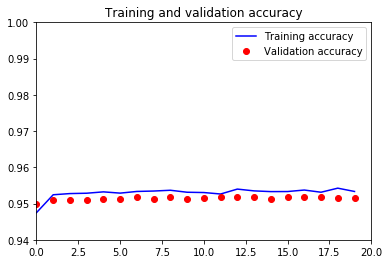

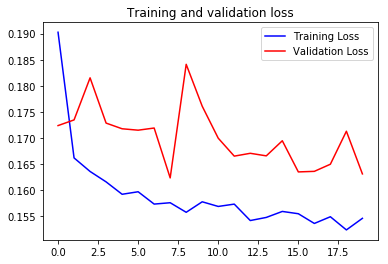

In [84]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy',color='red')
plt.xlim(0, 20)
plt.ylim(0.94,1)

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss', color='red')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [85]:
%cd /kaggle/working

from IPython.display import FileLink
import joblib

    
model.save("nmodel121.h5")    
FileLink("nmodel121.h5")

/kaggle/working


/kaggle/working/nmodel121.h5